This code takes the reprojected carbon stock layers and calculates zonal statistics across the y2y region based on ecoregion and landcover attributes, among others.

In [24]:
# import packages
import geopandas as gpd
import numpy as np
import rioxarray
import xarray

from geocube.api.core import make_geocube

In [25]:
# load 2017 ecoregions clipped to y2y and reproject to match rasters
eco = gpd.read_file('./land_cover/ecoregions2017_clipped.shp').to_crs('+proj=laea +lat_0=55 +lon_0=-125 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')
eco

,OBJECTID,ECO_NAME,BIOME_NUM,BIOME_NAME,REALM,ECO_BIOME_,NNH,ECO_ID,SHAPE_LENG,SHAPE_AREA,NNH_NAME,COLOR,COLOR_BIO,COLOR_NNH,LICENSE,geometry
0,13.0,Alberta-British Columbia foothills forests,5.0,Temperate Conifer Forests,Nearctic,NE05,2,345,62.333821,17.133639,Nature Could Reach Half Protected,#5DAD4C,#458970,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((231107.227 305009.454, 226734...."
1,74.0,Blue Mountains forests,5.0,Temperate Conifer Forests,Nearctic,NE05,3,348,22.624165,8.066966,Nature Could Recover,#35A85A,#458970,#F9A91B,CC-BY 4.0,"POLYGON ((614252.395 -1139094.041, 612099.656 ..."
2,83.0,British Columbia coastal conifer forests,5.0,Temperate Conifer Forests,Nearctic,NE05,2,349,86.917940,14.653986,Nature Could Reach Half Protected,#00A884,#458970,#7BC141,CC-BY 4.0,"POLYGON ((-166421.245 37682.88, -177859.583 32..."
3,84.0,Brooks-British Range tundra,11.0,Tundra,Nearctic,NE11,1,411,87.112754,34.783625,Half Protected,#66BECA,#9ED7C2,#257339,CC-BY 4.0,"MULTIPOLYGON (((-514179.871 1392834.151, -5147..."
4,95.0,Canadian Aspen forests and parklands,8.0,"Temperate Grasslands, Savannas & Shrublands",Nearctic,NE08,4,386,86.836978,40.677412,Nature Imperiled,#DB931A,#FEFF73,#EE1E23,CC-BY 4.0,"MULTIPOLYGON (((725180.479 -339910.34, 723716...."
5,133.0,Central British Columbia Mountain forests,5.0,Temperate Conifer Forests,Nearctic,NE05,2,350,36.323846,19.868732,Nature Could Reach Half Protected,#4CD970,#458970,#7BC141,CC-BY 4.0,"POLYGON ((192654.361 -120678.524, 194329.256 -..."
6,272.0,Fraser Plateau and Basin conifer forests,5.0,Temperate Conifer Forests,Nearctic,NE05,3,355,26.796172,13.925479,Nature Could Recover,#5ABD7A,#458970,#F9A91B,CC-BY 4.0,"POLYGON ((298504.267 -341027.666, 298711.41 -3..."
7,337.0,Interior Alaska-Yukon lowland taiga,6.0,Boreal Forests/Taiga,Nearctic,NE06,2,375,199.626313,80.342543,Nature Could Reach Half Protected,#6D3EC2,#7AB6F5,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((-627905.705 1421020.585, -6225..."
8,339.0,Interior Yukon-Alaska alpine tundra,11.0,Tundra,Nearctic,NE11,2,416,121.006872,29.065154,Nature Could Reach Half Protected,#6EE3C6,#9ED7C2,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((-713662.418 1111909.509, -7138..."
9,438.0,Mid-Canada Boreal Plains forests,6.0,Boreal Forests/Taiga,Nearctic,NE06,2,376,109.724632,79.516771,Nature Could Reach Half Protected,#DCB1F9,#7AB6F5,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((253378.224 142341.081, 266856...."


In [26]:
# filter by columns needed
eco = eco.filter(['OBJECTID', 'ECO_NAME', 'BIOME_NUM', 'BIOME_NAME', 'geometry'])
eco

,OBJECTID,ECO_NAME,BIOME_NUM,BIOME_NAME,geometry
0,13.0,Alberta-British Columbia foothills forests,5.0,Temperate Conifer Forests,"MULTIPOLYGON (((231107.227 305009.454, 226734...."
1,74.0,Blue Mountains forests,5.0,Temperate Conifer Forests,"POLYGON ((614252.395 -1139094.041, 612099.656 ..."
2,83.0,British Columbia coastal conifer forests,5.0,Temperate Conifer Forests,"POLYGON ((-166421.245 37682.88, -177859.583 32..."
3,84.0,Brooks-British Range tundra,11.0,Tundra,"MULTIPOLYGON (((-514179.871 1392834.151, -5147..."
4,95.0,Canadian Aspen forests and parklands,8.0,"Temperate Grasslands, Savannas & Shrublands","MULTIPOLYGON (((725180.479 -339910.34, 723716...."
5,133.0,Central British Columbia Mountain forests,5.0,Temperate Conifer Forests,"POLYGON ((192654.361 -120678.524, 194329.256 -..."
6,272.0,Fraser Plateau and Basin conifer forests,5.0,Temperate Conifer Forests,"POLYGON ((298504.267 -341027.666, 298711.41 -3..."
7,337.0,Interior Alaska-Yukon lowland taiga,6.0,Boreal Forests/Taiga,"MULTIPOLYGON (((-627905.705 1421020.585, -6225..."
8,339.0,Interior Yukon-Alaska alpine tundra,11.0,Tundra,"MULTIPOLYGON (((-713662.418 1111909.509, -7138..."
9,438.0,Mid-Canada Boreal Plains forests,6.0,Boreal Forests/Taiga,"MULTIPOLYGON (((253378.224 142341.081, 266856...."


In [27]:
# rename id columns
eco = eco.rename(columns={'OBJECTID': 'ECO_ID', 'BIOME_NUM': 'BIOME_ID'})
eco

,ECO_ID,ECO_NAME,BIOME_ID,BIOME_NAME,geometry
0,13.0,Alberta-British Columbia foothills forests,5.0,Temperate Conifer Forests,"MULTIPOLYGON (((231107.227 305009.454, 226734...."
1,74.0,Blue Mountains forests,5.0,Temperate Conifer Forests,"POLYGON ((614252.395 -1139094.041, 612099.656 ..."
2,83.0,British Columbia coastal conifer forests,5.0,Temperate Conifer Forests,"POLYGON ((-166421.245 37682.88, -177859.583 32..."
3,84.0,Brooks-British Range tundra,11.0,Tundra,"MULTIPOLYGON (((-514179.871 1392834.151, -5147..."
4,95.0,Canadian Aspen forests and parklands,8.0,"Temperate Grasslands, Savannas & Shrublands","MULTIPOLYGON (((725180.479 -339910.34, 723716...."
5,133.0,Central British Columbia Mountain forests,5.0,Temperate Conifer Forests,"POLYGON ((192654.361 -120678.524, 194329.256 -..."
6,272.0,Fraser Plateau and Basin conifer forests,5.0,Temperate Conifer Forests,"POLYGON ((298504.267 -341027.666, 298711.41 -3..."
7,337.0,Interior Alaska-Yukon lowland taiga,6.0,Boreal Forests/Taiga,"MULTIPOLYGON (((-627905.705 1421020.585, -6225..."
8,339.0,Interior Yukon-Alaska alpine tundra,11.0,Tundra,"MULTIPOLYGON (((-713662.418 1111909.509, -7138..."
9,438.0,Mid-Canada Boreal Plains forests,6.0,Boreal Forests/Taiga,"MULTIPOLYGON (((253378.224 142341.081, 266856...."


In [28]:
# load land carbon in tonnes
carbon_t = rioxarray.open_rasterio(
    './carbon_stock_data/output_layers/carbon_sothe_spawn_t_laea.tif', masked=True
).rio.clip(
    eco.geometry.values, eco.crs, from_disk=True)
carbon_t.name = "carbon_t"

# load land carbon in t/ha
carbon_t_ha = rioxarray.open_rasterio(
    './carbon_stock_data/output_layers/carbon_sothe_spawn_t_ha_laea.tif', masked=True
).rio.clip(
    eco.geometry.values, eco.crs, from_disk=True)
carbon_t_ha.name = "carbon_t_ha"

In [29]:
# load soc in tonnes
soc_t = rioxarray.open_rasterio(
    './carbon_stock_data/output_layers/soc_0_1m_t_laea.tif', masked=True
).rio.clip(
    eco.geometry.values, eco.crs, from_disk=True)
soc_t.name = "soc_t"

# load soc in t/ha
soc_t_ha = rioxarray.open_rasterio(
    './carbon_stock_data/output_layers/soc_0_1m_t_ha_laea.tif', masked=True
).rio.clip(
    eco.geometry.values, eco.crs, from_disk=True)
soc_t_ha.name = "soc_t_ha"

In [43]:
# create output grid
out_grid = make_geocube(
    vector_data=eco,
    measurements=['ECO_ID', 'BIOME_ID'],
    like=carbon_t
)
out_grid

<xarray.Dataset> Size: 2GB
Dimensions:      (y: 11122, x: 8514)
Coordinates:
  * y            (y) float64 89kB 1.429e+06 1.428e+06 ... -1.351e+06 -1.352e+06
  * x            (x) float64 68kB -7.585e+05 -7.582e+05 ... 1.37e+06 1.37e+06
    spatial_ref  int64 8B 0
Data variables:
    ECO_ID       (y, x) float64 758MB nan nan nan nan nan ... nan nan nan nan
    BIOME_ID     (y, x) float64 758MB nan nan nan nan nan ... nan nan nan nan

In [45]:
# merge the datacube with the carbon variables together
out_grid['carbon_t'] = (carbon_t.dims, carbon_t.values, carbon_t.attrs, carbon_t.encoding)
out_grid['carbon_t_ha'] = (carbon_t_ha.dims, carbon_t_ha.values, carbon_t_ha.attrs, carbon_t_ha.encoding)
out_grid['soc_t'] = (soc_t.dims, soc_t.values, soc_t.attrs, soc_t.encoding)
out_grid['soc_t_ha'] = (soc_t_ha.dims, soc_t_ha.values, soc_t_ha.attrs, soc_t_ha.encoding)
out_grid

<xarray.Dataset> Size: 5GB
Dimensions:      (y: 11122, x: 8514, band: 1)
Coordinates:
  * y            (y) float64 89kB 1.429e+06 1.428e+06 ... -1.351e+06 -1.352e+06
  * x            (x) float64 68kB -7.585e+05 -7.582e+05 ... 1.37e+06 1.37e+06
    spatial_ref  int64 8B 0
Dimensions without coordinates: band
Data variables:
    ECO_ID       (y, x) float64 758MB nan nan nan nan nan ... nan nan nan nan
    BIOME_ID     (y, x) float64 758MB nan nan nan nan nan ... nan nan nan nan
    carbon_t     (band, y, x) float64 758MB nan nan nan nan ... nan nan nan nan
    carbon_t_ha  (band, y, x) float64 758MB nan nan nan nan ... nan nan nan nan
    soc_t        (band, y, x) float64 758MB nan nan nan nan ... nan nan nan nan
    soc_t_ha     (band, y, x) float64 758MB nan nan nan nan ... nan nan nan nan

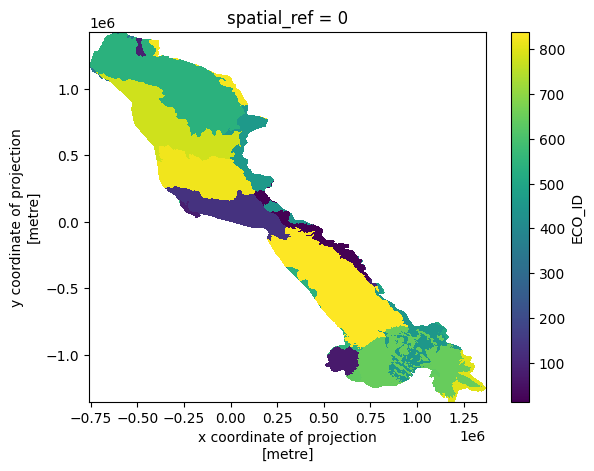

In [46]:
# plot the ecoregions
out_grid.ECO_ID.plot.imshow()

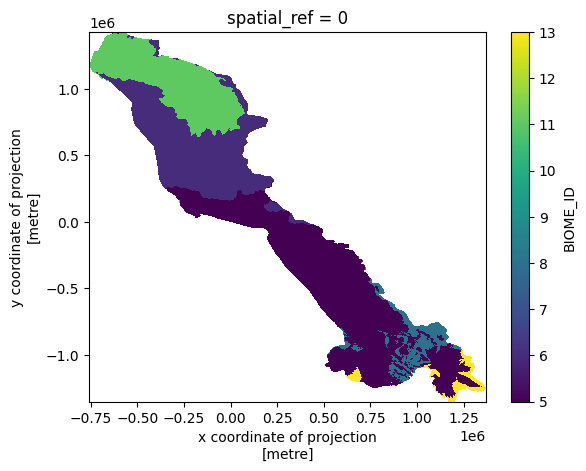

In [47]:
# plot the biomes
out_grid.BIOME_ID.plot.imshow()

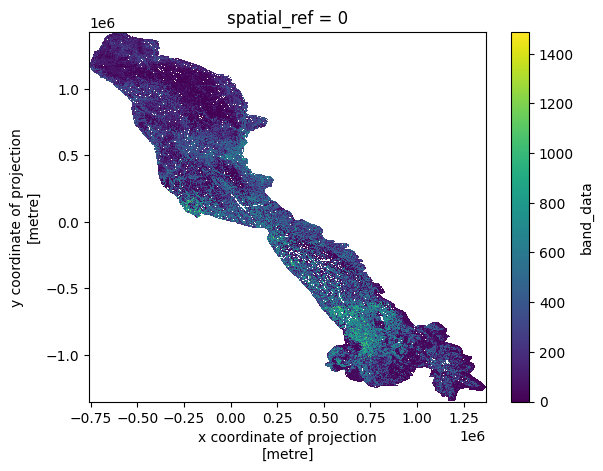

In [48]:
# plot the carbon
out_grid.carbon_t.plot()

In [100]:
# get carbon stats by ecoregion and biome
# group data by ecoregion for total carbon
grouped_eco_total = out_grid.drop_vars(['BIOME_ID', 'spatial_ref', 'carbon_t_ha', 'soc_t_ha']).groupby('ECO_ID')

# group data by biome for total carbon
grouped_biome_total = out_grid.drop_vars(['ECO_ID', 'spatial_ref', 'carbon_t_ha', 'soc_t_ha']).groupby('BIOME_ID')

In [101]:
# calculate total carbon by ecoregion
total_c_eco = grouped_eco_total.sum().rename(
        {'carbon_t': 'total_carbon',
         'soc_t': 'total_soc'}
        )

# calculate total carbon by biome
total_c_biome = grouped_biome_total.sum().rename(
        {'carbon_t': 'total_carbon',
         'soc_t': 'total_soc'}
        )

/Users/bermane/Team Braintree Dropbox/Ethan Berman/Python Projects/y2y-carbon/.venv/lib/python3.12/site-packages/xarray/core/concat.py:540: UserWarning: No index created for dimension ECO_ID because variable ECO_ID is not a coordinate. To create an index for ECO_ID, please first call `.set_coords('ECO_ID')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)
/Users/bermane/Team Braintree Dropbox/Ethan Berman/Python Projects/y2y-carbon/.venv/lib/python3.12/site-packages/xarray/core/concat.py:540: UserWarning: No index created for dimension BIOME_ID because variable BIOME_ID is not a coordinate. To create an index for BIOME_ID, please first call `.set_coords('BIOME_ID')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)


In [102]:
# group data by ecoregion for average carbon density
grouped_eco_avg = out_grid.drop_vars(['BIOME_ID', 'spatial_ref', 'carbon_t', 'soc_t']).groupby('ECO_ID')

# group data by biome for average carbon density
grouped_biome_avg = out_grid.drop_vars(['ECO_ID', 'spatial_ref', 'carbon_t', 'soc_t']).groupby('BIOME_ID')

In [103]:
# calculate average carbon density by ecoregion
avg_c_eco = grouped_eco_avg.mean().rename(
        {'carbon_t_ha': 'avg_carbon_density',
         'soc_t_ha': 'avg_soc_density'}
        )

# calculate average carbon density by biome
avg_c_biome = grouped_biome_avg.mean().rename(
        {'carbon_t_ha': 'avg_carbon_density',
         'soc_t_ha': 'avg_soc_density'}
        )

/Users/bermane/Team Braintree Dropbox/Ethan Berman/Python Projects/y2y-carbon/.venv/lib/python3.12/site-packages/xarray/core/concat.py:540: UserWarning: No index created for dimension ECO_ID because variable ECO_ID is not a coordinate. To create an index for ECO_ID, please first call `.set_coords('ECO_ID')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)
/Users/bermane/Team Braintree Dropbox/Ethan Berman/Python Projects/y2y-carbon/.venv/lib/python3.12/site-packages/xarray/core/concat.py:540: UserWarning: No index created for dimension BIOME_ID because variable BIOME_ID is not a coordinate. To create an index for BIOME_ID, please first call `.set_coords('BIOME_ID')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)


In [123]:
# merge zonal stats
stats_eco = xarray.merge([total_c_eco, avg_c_eco]).to_dataframe()
stats_biome = xarray.merge([total_c_biome, avg_c_biome]).to_dataframe()

In [124]:
# drop band index
stats_eco.reset_index(inplace=True)
stats_biome.reset_index(inplace=True)

# # set ECO_ID to ECO_NAME map
# eco_map = dict(zip(eco['ECO_ID'], eco['ECO_NAME']))

# # set BIOME_ID to BIOME_NAME map
# biome_map = dict(zip(eco['BIOME_ID'], eco['BIOME_NAME']))

# # replace ECO_ID with ECO_NAME
# stats_eco.rename(index=eco_map, inplace=True)

# # replace BIOME_ID with BIOME_NAME
# stats_biome.rename(index=biome_map, inplace=True)

# change tonnes carbon to Pg carbon
stats_eco['total_carbon'] /= 1e+09
stats_eco['total_soc'] /= 1e+09
stats_biome['total_carbon'] /= 1e+09
stats_biome['total_soc'] /= 1e+09
stats_eco

,ECO_ID,band,total_carbon,total_soc,avg_carbon_density,avg_soc_density
0,13.0,0,0.235617,0.629808,51.875712,138.675228
1,74.0,0,0.141362,0.328724,51.002059,118.673549
2,83.0,0,0.042514,0.091729,95.729864,206.783162
3,84.0,0,0.007826,0.135608,17.801766,308.435985
4,95.0,0,0.002829,0.032334,21.429465,244.769495
5,133.0,0,0.607495,1.704693,62.469662,175.383130
6,272.0,0,0.000046,0.000130,59.760637,170.710677
7,337.0,0,0.001093,0.060416,17.724962,982.479784
8,339.0,0,0.004798,0.026673,45.781130,254.618256
9,438.0,0,0.048127,0.107996,49.877808,111.967570


In [125]:
stats_biome

,BIOME_ID,band,total_carbon,total_soc,avg_carbon_density,avg_soc_density
0,5.0,0,3.455336,11.555006,58.816893,196.841827
1,6.0,0,1.494366,8.486796,40.600902,230.707801
2,8.0,0,0.106192,0.905325,14.147097,120.661866
3,11.0,0,0.473850,7.495617,16.939689,268.036133
4,13.0,0,0.020375,0.304767,7.046999,105.499744


In [126]:
# total carbon stored (+sanity check should be equal across tables)
print(stats_eco['total_carbon'].sum())
print(stats_biome['total_carbon'].sum())
print(stats_eco['total_soc'].sum())
print(stats_biome['total_soc'].sum())

5.550120759898942
5.550120759898938
28.74751131841607
28.747511318416063


In [130]:
# add ecoregion stats to vector data
ecoregions = eco.merge(stats_eco, on='ECO_ID')
ecoregions

,ECO_ID,ECO_NAME,BIOME_ID,BIOME_NAME,geometry,band,total_carbon,total_soc,avg_carbon_density,avg_soc_density
0,13.0,Alberta-British Columbia foothills forests,5.0,Temperate Conifer Forests,"MULTIPOLYGON (((231107.227 305009.454, 226734....",0,0.235617,0.629808,51.875712,138.675228
1,74.0,Blue Mountains forests,5.0,Temperate Conifer Forests,"POLYGON ((614252.395 -1139094.041, 612099.656 ...",0,0.141362,0.328724,51.002059,118.673549
2,83.0,British Columbia coastal conifer forests,5.0,Temperate Conifer Forests,"POLYGON ((-166421.245 37682.88, -177859.583 32...",0,0.042514,0.091729,95.729864,206.783162
3,84.0,Brooks-British Range tundra,11.0,Tundra,"MULTIPOLYGON (((-514179.871 1392834.151, -5147...",0,0.007826,0.135608,17.801766,308.435985
4,95.0,Canadian Aspen forests and parklands,8.0,"Temperate Grasslands, Savannas & Shrublands","MULTIPOLYGON (((725180.479 -339910.34, 723716....",0,0.002829,0.032334,21.429465,244.769495
5,133.0,Central British Columbia Mountain forests,5.0,Temperate Conifer Forests,"POLYGON ((192654.361 -120678.524, 194329.256 -...",0,0.607495,1.704693,62.469662,175.383130
6,272.0,Fraser Plateau and Basin conifer forests,5.0,Temperate Conifer Forests,"POLYGON ((298504.267 -341027.666, 298711.41 -3...",0,0.000046,0.000130,59.760637,170.710677
7,337.0,Interior Alaska-Yukon lowland taiga,6.0,Boreal Forests/Taiga,"MULTIPOLYGON (((-627905.705 1421020.585, -6225...",0,0.001093,0.060416,17.724962,982.479784
8,339.0,Interior Yukon-Alaska alpine tundra,11.0,Tundra,"MULTIPOLYGON (((-713662.418 1111909.509, -7138...",0,0.004798,0.026673,45.781130,254.618256
9,438.0,Mid-Canada Boreal Plains forests,6.0,Boreal Forests/Taiga,"MULTIPOLYGON (((253378.224 142341.081, 266856....",0,0.048127,0.107996,49.877808,111.967570


In [131]:
# clean up vector data
ecoregions.drop('band', axis=1, inplace=True)
ecoregions.rename(columns={'total_carbon': 'total_carbon_pg',
                           'total_soc': 'total_soc_pg',
                           'avg_carbon_density': 'avg_carbon_density_t_ha',
                           'avg_soc_density': 'avg_soc_density_t_ha'},
                           inplace=True)
ecoregions

,ECO_ID,ECO_NAME,BIOME_ID,BIOME_NAME,geometry,total_carbon_pg,total_soc_pg,avg_carbon_density_t_ha,avg_soc_density_t_ha
0,13.0,Alberta-British Columbia foothills forests,5.0,Temperate Conifer Forests,"MULTIPOLYGON (((231107.227 305009.454, 226734....",0.235617,0.629808,51.875712,138.675228
1,74.0,Blue Mountains forests,5.0,Temperate Conifer Forests,"POLYGON ((614252.395 -1139094.041, 612099.656 ...",0.141362,0.328724,51.002059,118.673549
2,83.0,British Columbia coastal conifer forests,5.0,Temperate Conifer Forests,"POLYGON ((-166421.245 37682.88, -177859.583 32...",0.042514,0.091729,95.729864,206.783162
3,84.0,Brooks-British Range tundra,11.0,Tundra,"MULTIPOLYGON (((-514179.871 1392834.151, -5147...",0.007826,0.135608,17.801766,308.435985
4,95.0,Canadian Aspen forests and parklands,8.0,"Temperate Grasslands, Savannas & Shrublands","MULTIPOLYGON (((725180.479 -339910.34, 723716....",0.002829,0.032334,21.429465,244.769495
5,133.0,Central British Columbia Mountain forests,5.0,Temperate Conifer Forests,"POLYGON ((192654.361 -120678.524, 194329.256 -...",0.607495,1.704693,62.469662,175.383130
6,272.0,Fraser Plateau and Basin conifer forests,5.0,Temperate Conifer Forests,"POLYGON ((298504.267 -341027.666, 298711.41 -3...",0.000046,0.000130,59.760637,170.710677
7,337.0,Interior Alaska-Yukon lowland taiga,6.0,Boreal Forests/Taiga,"MULTIPOLYGON (((-627905.705 1421020.585, -6225...",0.001093,0.060416,17.724962,982.479784
8,339.0,Interior Yukon-Alaska alpine tundra,11.0,Tundra,"MULTIPOLYGON (((-713662.418 1111909.509, -7138...",0.004798,0.026673,45.781130,254.618256
9,438.0,Mid-Canada Boreal Plains forests,6.0,Boreal Forests/Taiga,"MULTIPOLYGON (((253378.224 142341.081, 266856....",0.048127,0.107996,49.877808,111.967570
